In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify  

In [2]:
file_path = 'Results_21Mar2022.csv'  
data = pd.read_csv(file_path)


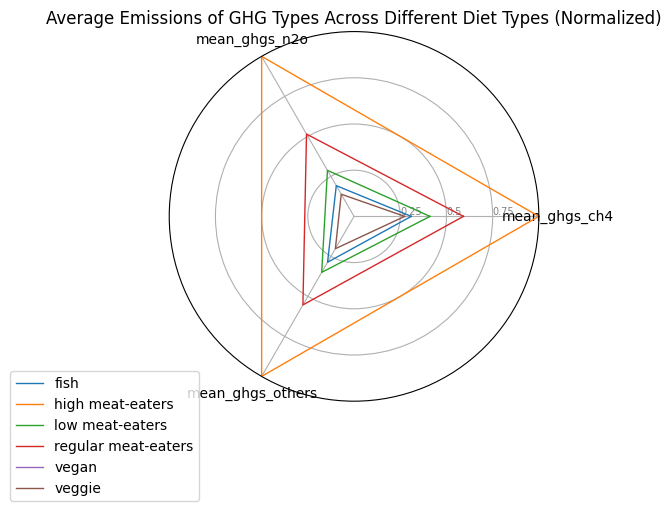

In [2]:
from math import pi
import numpy as np
file_path = 'Results_21Mar2022.csv'  # Update this path to where your file is located
data = pd.read_csv(file_path)
data['mean_ghgs_others'] = data['mean_ghgs'] - data['mean_ghgs_ch4'] - data['mean_ghgs_n2o']
# Calculate the mean values for each GHG type and diet type
mean_values = data.groupby('diet_group')[['mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_ghgs_others']].mean()
mean_values = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())  # Normalize

# Create the radar chart
categories = mean_values.columns
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the radar plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=7)
plt.ylim(0, 1)

# Plot each diet type
for index, row in mean_values.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)

plt.title('Average Emissions of GHG Types Across Different Diet Types (Normalized)')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


<Figure size 1000x600 with 0 Axes>

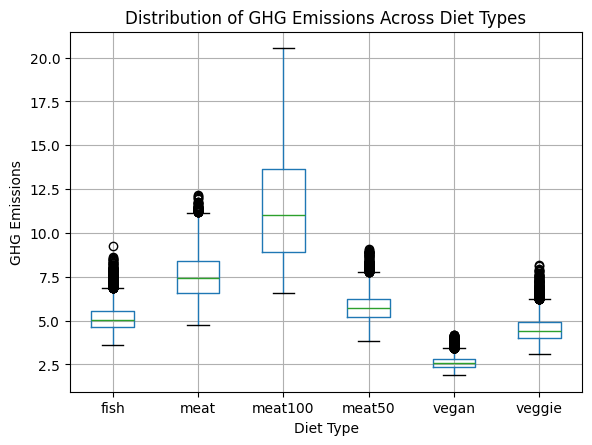

In [12]:
# Create a box plot for mean_ghgs across diet types
plt.figure(figsize=(10, 6))
data.boxplot(column='mean_ghgs', by='diet_group')
plt.title('Distribution of GHG Emissions Across Diet Types')
plt.xlabel('Diet Type')
plt.ylabel('GHG Emissions')
plt.suptitle('')  # Suppress the default title
plt.show()


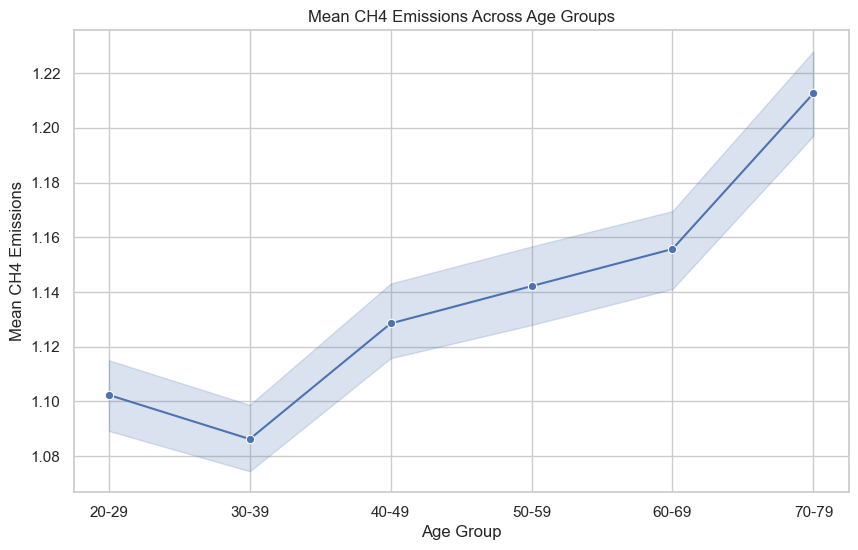

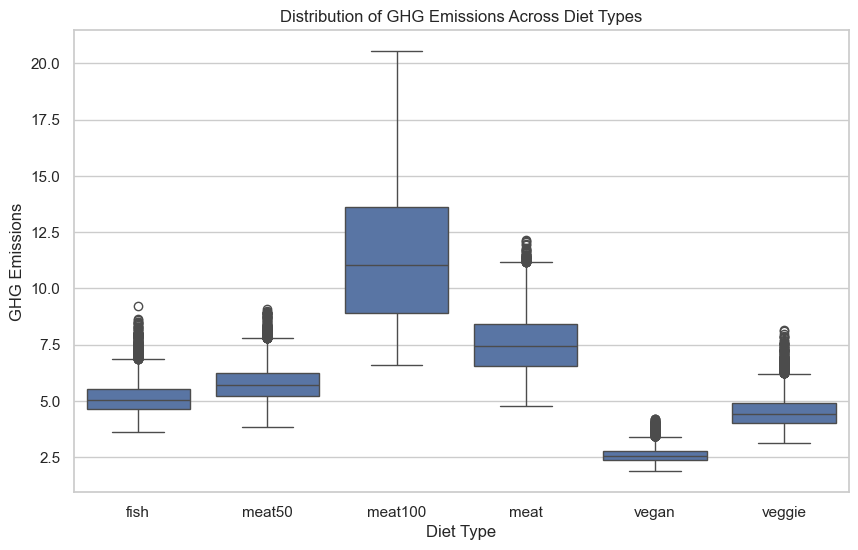

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn theme
sns.set_theme(style="whitegrid")
# 3. Box Plot for GHG Emissions Across Different Diet Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='diet_group', y='mean_ghgs')
plt.title('Distribution of GHG Emissions Across Diet Types')
plt.xlabel('Diet Type')
plt.ylabel('GHG Emissions')
plt.show()


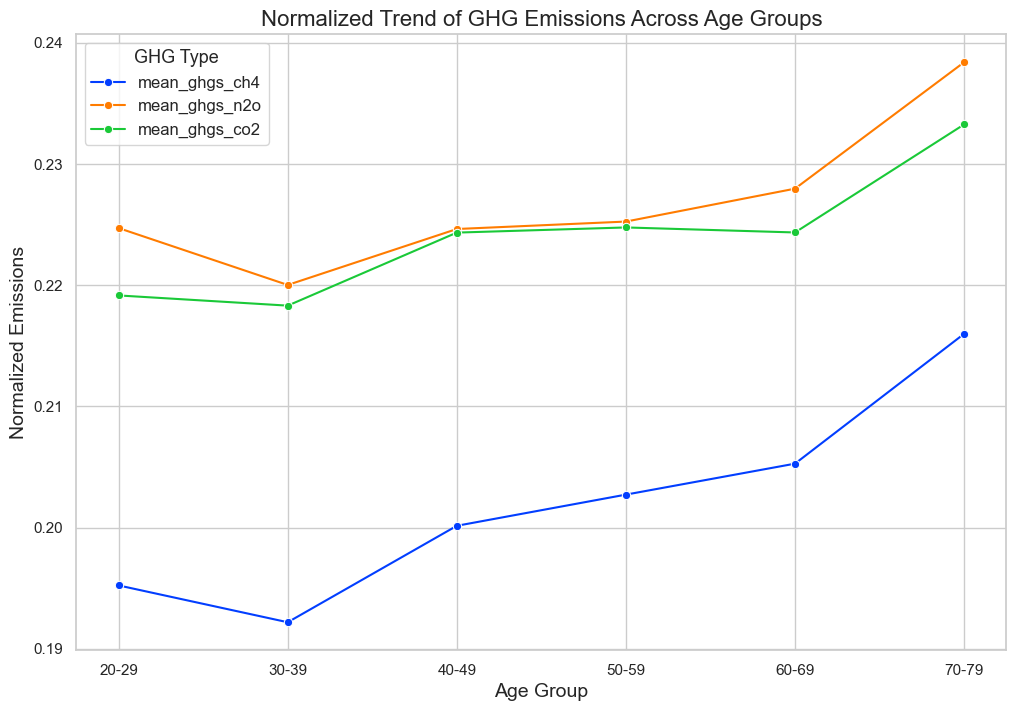

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


data['mean_ghgs_co2'] = data['mean_ghgs'] - data['mean_ghgs_ch4'] - data['mean_ghgs_n2o']

# Melt the DataFrame
melted_data = data.melt(id_vars=['age_group'], value_vars=['mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_ghgs_co2'],
                        var_name='GHG_Type', value_name='Emissions')

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Emissions' within each GHG type
melted_data['Emissions'] = melted_data.groupby('GHG_Type')['Emissions'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create the line chart with normalized emissions
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(data=melted_data, x='age_group', y='Emissions', hue='GHG_Type', marker='o', style='GHG_Type', dashes=False, palette='bright', errorbar=None)

# Set title and axis labels
plt.title('Normalized Trend of GHG Emissions Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Normalized Emissions', fontsize=14)

# Adjust the legend
plt.legend(title='GHG Type', title_fontsize='13', fontsize='12', loc='upper left')

# Add grid lines
plt.grid(True)

# Save the figure with high resolution
plt.savefig('ghg_emissions_trend.png', dpi=300)

# Display the plot
plt.show()


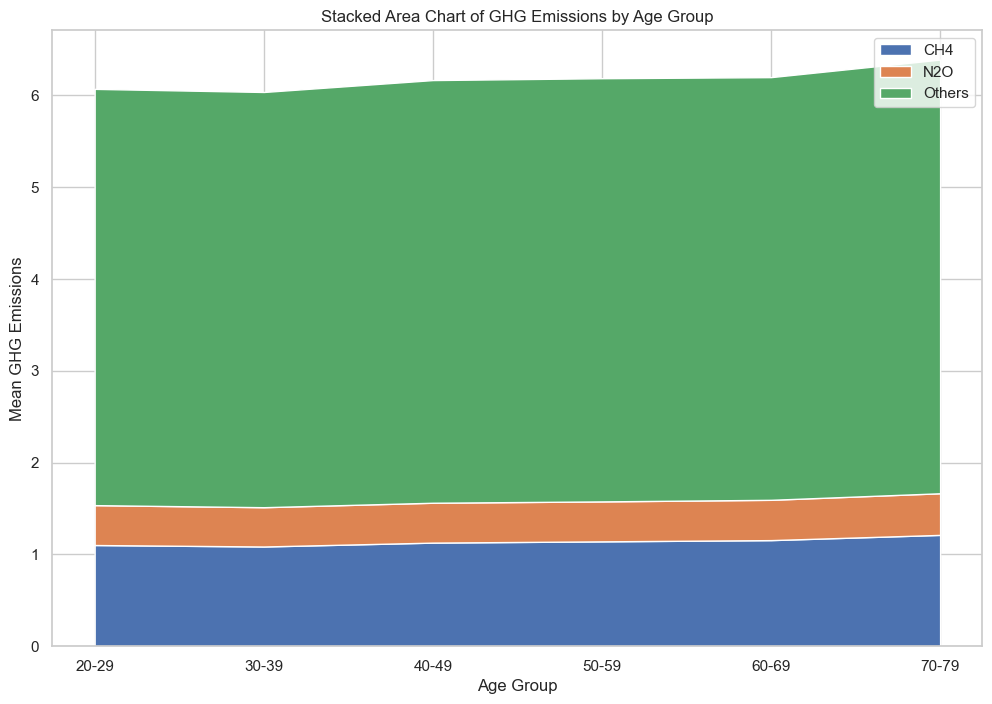

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and it's already loaded

# Calculate 'mean_ghgs_others'
data['mean_ghgs_others'] = data['mean_ghgs'] - data['mean_ghgs_ch4'] - data['mean_ghgs_n2o']

# Aggregate data by age group
age_grouped = data.groupby('age_group').agg({
    'mean_ghgs_ch4': 'mean',
    'mean_ghgs_n2o': 'mean',
    'mean_ghgs_others': 'mean'
}).reset_index()

# Reorder the age groups if necessary
# age_grouped['age_group'] = pd.Categorical(age_grouped['age_group'], categories=[your_age_groups], ordered=True)
# age_grouped = age_grouped.sort_values('age_group')

# Plotting the stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(age_grouped['age_group'], age_grouped['mean_ghgs_ch4'], age_grouped['mean_ghgs_n2o'], age_grouped['mean_ghgs_others'], labels=['CH4', 'N2O', 'Others'])
plt.legend(loc='upper right')
plt.title('Stacked Area Chart of GHG Emissions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean GHG Emissions')
plt.show()


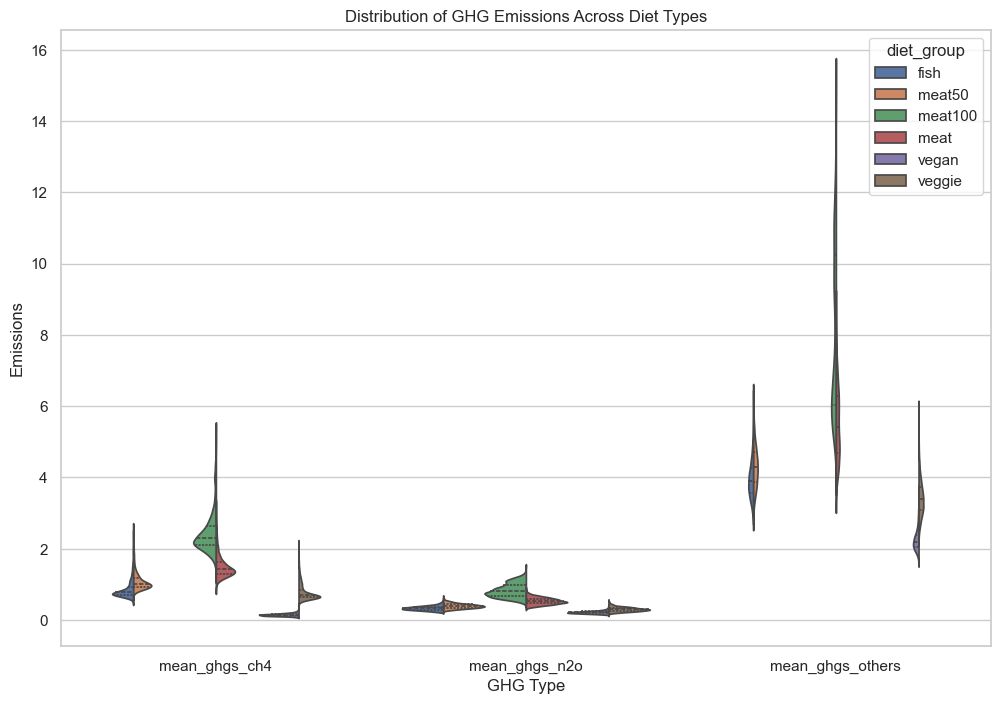

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate 'mean_ghgs_others' if not already calculated
data['mean_ghgs_others'] = data['mean_ghgs'] - data['mean_ghgs_ch4'] - data['mean_ghgs_n2o']

# Melt the data to have a suitable format for the violin plot
melted_data = data.melt(id_vars=['diet_group'], value_vars=['mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_ghgs_others'],
                        var_name='GHG_Type', value_name='Emissions')

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='GHG_Type', y='Emissions', hue='diet_group', data=melted_data, split=True, inner='quartile')
plt.title('Distribution of GHG Emissions Across Diet Types')
plt.xlabel('GHG Type')
plt.ylabel('Emissions')
plt.show()
